In [2]:
 #conda install -c conda-forge fbprophet 
!pip install plotly

In [3]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split


In [4]:
path1="./PPG_FieldStudy/S1/S1.pkl"
path2="./PPG_FieldStudy/S2/S2.pkl"
path3="./PPG_FieldStudy/S3/S3.pkl"
path4="./PPG_FieldStudy/S4/S4.pkl"
path5="./PPG_FieldStudy/S5/S5.pkl"
path6="./PPG_FieldStudy/S6/S6.pkl"
path7="./PPG_FieldStudy/S7/S7.pkl"
path8="./PPG_FieldStudy/S8/S8.pkl"
path9="./PPG_FieldStudy/S9/S9.pkl"
path10="./PPG_FieldStudy/S10/S10.pkl"
path11="./PPG_FieldStudy/S11/S11.pkl"
path12="./PPG_FieldStudy/S12/S12.pkl"
path13="./PPG_FieldStudy/S13/S13.pkl"
path14="./PPG_FieldStudy/S14/S14.pkl"
path15="./PPG_FieldStudy/S15/S15.pkl"


In [11]:
def heart_rate_feature(path):
    with open(path, "rb") as f:
        data = pickle.load(f, encoding="latin-1")
        diff=len(data['activity'])-(8*len(data['label']))
    #print(data)

    activity=[]
    for i in range(len(data['activity'])-diff):
        activity.append(data['activity'][i])


    Heart_rate=[]
#creation d'un tableau à l'dchelle pour le Hr 
    for i in range(len(data['label'])):
        for j in range(8):
            Heart_rate.append(data['label'][i])

                
    diff=len(activity)-(len(Heart_rate))
    #print(diff)

    questionnaire=[]
    for i in data['questionnaire'].keys():
        questionnaire.append(data['questionnaire'][i])
    questionnaire

    activity=pd.DataFrame(activity)
    Heart_rate=pd.DataFrame(Heart_rate)
    questionnaire=pd.DataFrame.from_dict(data['questionnaire'],orient='index')
    questionnaire=questionnaire.T

    if questionnaire['Gender'].iloc[0]==' m':
        questionnaire['male']  = [1]
        questionnaire['Female']= [0]

    elif questionnaire['Gender'].iloc[0]==' f': 

        questionnaire['Female'] = [1]
        questionnaire['male']   = [0]


    questionnaire=questionnaire.drop(columns=['Gender'])

    questionnaire

    test=[]
    index=[]

    for i in range(len(activity)):
        test.append(questionnaire.iloc[0])
        index.append(i)
    questionnaire=pd.DataFrame(test)
    questionnaire=questionnaire.set_index([index])

    questionnaire


    heart_rate_feature=Heart_rate.join(questionnaire)
    #heart_rate_feature=heart_rate_feature.join(activity)
    return (heart_rate_feature, activity)
    #return data['signal']

In [6]:
### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
feat1, targ1=heart_rate_feature(path1)
feat2, targ2=heart_rate_feature(path2)
feat3, targ3=heart_rate_feature(path3)
feat4, targ4=heart_rate_feature(path4)
feat5, targ5=heart_rate_feature(path5)
feat6, targ6=heart_rate_feature(path6)
feat7, targ7=heart_rate_feature(path7)
feat8, targ8=heart_rate_feature(path8)
feat9, targ9=heart_rate_feature(path9)
feat10, targ10=heart_rate_feature(path10)
feat11, targ11=heart_rate_feature(path11)
feat12, targ12=heart_rate_feature(path12)
feat13, targ13=heart_rate_feature(path13)
feat14, targ14=heart_rate_feature(path14)
feat15, targ15=heart_rate_feature(path15)



In [13]:
features=(feat1.append(feat2)).append(feat3).append(feat4).append(feat5).append(feat6).append(feat7).append(feat8).append(feat9).append(feat10).append(feat11).append(feat12).append(feat13).append(feat14).append(feat15)
target=targ1.append(targ2).append(targ3).append(targ4).append(targ5).append(targ6).append(targ7).append(targ8).append(targ9).append(targ10).append(targ11).append(targ12).append(targ13).append(targ14).append(targ15)

C:\Users\mendu\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [ ]:
#features

In [14]:
X, y = features,target

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 35, alpha = 30, n_estimators = 700)

In [17]:

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print(preds)
predictions = [round(value) for value in preds]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[10:12:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2.4731934e-01 3.4574896e-02 5.8963299e-03 ... 1.0002954e+00 5.9927001e+00
 1.0015762e+00]
Accuracy: 99.20%


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.181732


# ------------------------------------------------- Data Viz ----------------------------------------------

In [ ]:

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

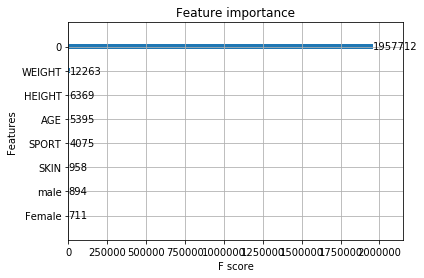

In [22]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [23]:
dfx=X
dfx=dfx.rename(columns={0: "heart_rate"})
dfy=y
dfy=dfy.rename(columns={0: "activity"})
df= dfx.T

In [24]:
df=df.append(dfy.T)
df=df.T

In [44]:
df

,heart_rate,WEIGHT,AGE,HEIGHT,SKIN,SPORT,male,Female,activity
0,49.611369,78.0,34.0,182.0,3.0,6.0,1.0,0.0,0.0
1,49.611369,78.0,34.0,182.0,3.0,6.0,1.0,0.0,0.0
2,49.611369,78.0,34.0,182.0,3.0,6.0,1.0,0.0,0.0
3,49.611369,78.0,34.0,182.0,3.0,6.0,1.0,0.0,0.0
4,49.611369,78.0,34.0,182.0,3.0,6.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
31723,80.853007,79.0,28.0,183.0,2.0,5.0,1.0,0.0,0.0
31724,80.853007,79.0,28.0,183.0,2.0,5.0,1.0,0.0,0.0
31725,80.853007,79.0,28.0,183.0,2.0,5.0,1.0,0.0,0.0
31726,80.853007,79.0,28.0,183.0,2.0,5.0,1.0,0.0,0.0


In [35]:
len(df['heart_rate'])

517576

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")



In [42]:
heart_rate=[]
index=[]
for i in range(len(df['heart_rate'])):
    if i%8==0:
        heart_rate.append(df['heart_rate'].iloc[i])
        index.append(i/8)

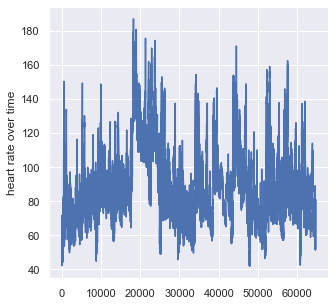

In [43]:
import matplotlib.pyplot as plt
plt.plot(index,heart_rate)
plt.ylabel('heart rate over time')
plt.show()


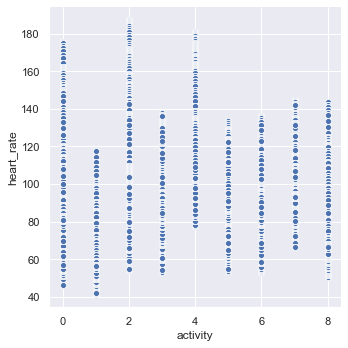

In [49]:
sns.relplot(x="activity", y="heart_rate", data=df);

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### random forest


In [58]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # 70% training and 30% test

In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\mendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [60]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\mendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [61]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9976090537165931


In [62]:
estimator = clf.estimators_[5]


## Grid search 

In [72]:
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)


In [73]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,  
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 45.0min finished
C:\Users\mendu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [75]:
best=rf_random.best_params_

In [56]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [67]:
base_model = RandomForestClassifier(n_estimators = 15)
base_model.fit(X_train, y_train)

y_pred=base_model.predict(X_test)
base_accuracy= evaluate(accuracy_score,y_test, y_pred)



C:\Users\mendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


AttributeError: 'function' object has no attribute 'predict'

In [76]:
base_model = RandomForestClassifier(n_estimators = 15)
base_model.fit(X_train, y_train)
y_pred_base=base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)



random_model = RandomForestClassifier(n_estimators =best['n_estimators'] )
random_model.fit(X_train, y_train)
y_pred_random=base_model.predict(X_test)

random_accuracy = metrics.accuracy_score(y_test, y_pred_random)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

C:\Users\mendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\mendu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Improvement of -0.15%.


### roc score

In [51]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(X_test, rf_probs)

NameError: name 'rf_probs' is not defined